# Reading the Data and cleaning

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as ignore_warnings

In [171]:
df_rain = pd.read_csv('/Users/senakshikrishnamurthy/Desktop/Sena/Project/Rainfall_analysis/d7b0dc22-053d-4a91-8e90-2f8b2ab794e4/data/climate_sirsi_westernghats.csv')

In [172]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75747 entries, 0 to 75746
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               62960 non-null  object 
 1   Time               62960 non-null  object 
 2   RH %               75747 non-null  float64
 3   AirTemp_degC       62960 non-null  float64
 4   Precip_mm/10 mins  62960 non-null  float64
 5   WindDir_deg        62960 non-null  float64
 6   WindGust_km/hr     62960 non-null  float64
 7   DewPoint_DegC      62960 non-null  float64
dtypes: float64(6), object(2)
memory usage: 4.6+ MB


In [173]:
# Display the first few rows of the dataframe
df_rain.head()

,Date,Time,RH %,AirTemp_degC,Precip_mm/10 mins,WindDir_deg,WindGust_km/hr,DewPoint_DegC
0,10/02/2021,17:40,59.9,26.8,0.0,134.0,0.0,18.5
1,10/02/2021,17:50,62.1,26.2,0.0,175.0,0.0,18.5
2,10/02/2021,18:00,64.9,25.9,0.0,182.0,0.0,18.9
3,10/02/2021,18:10,70.0,24.9,0.0,182.0,0.0,19.2
4,10/02/2021,18:20,72.6,24.2,0.0,182.0,0.0,19.1


In [174]:
print("Shape before cleaning:", df_rain.shape)


Shape before cleaning: (75747, 8)


In [175]:
# Drop columns with all missing values
df_rain.dropna(axis=1, how='all', inplace=True)

In [176]:

# Fill missing values
for col in df_rain.columns:
    if df_rain[col].dtype == 'object':
        df_rain[col].fillna(df_rain[col].mode()[0])
    else:
        df_rain[col].fillna(df_rain[col].mean())

In [177]:
# Drop duplicates
df_rain.drop_duplicates(inplace=True)

In [178]:
df_rain

,Date,Time,RH %,AirTemp_degC,Precip_mm/10 mins,WindDir_deg,WindGust_km/hr,DewPoint_DegC
0,10/02/2021,17:40,59.9,26.8,0.0,134.0,0.0,18.5
1,10/02/2021,17:50,62.1,26.2,0.0,175.0,0.0,18.5
2,10/02/2021,18:00,64.9,25.9,0.0,182.0,0.0,18.9
3,10/02/2021,18:10,70.0,24.9,0.0,182.0,0.0,19.2
4,10/02/2021,18:20,72.6,24.2,0.0,182.0,0.0,19.1
...,...,...,...,...,...,...,...,...
71867,NaN,NaN,61.0,NaN,NaN,NaN,NaN,NaN
71868,NaN,NaN,61.2,NaN,NaN,NaN,NaN,NaN
71869,NaN,NaN,61.3,NaN,NaN,NaN,NaN,NaN
71884,NaN,NaN,60.8,NaN,NaN,NaN,NaN,NaN


In [179]:
df_rain[df_rain['Precip_mm/10 mins'] > 0]

,Date,Time,RH %,AirTemp_degC,Precip_mm/10 mins,WindDir_deg,WindGust_km/hr,DewPoint_DegC
430,13/02/2021,17:20,56.9,28.4,0.5,162.0,4.0,19.2
1111,18/02/2021,10:50,71.1,26.8,0.5,265.0,0.0,21.2
1206,19/02/2021,02:40,97.5,18.1,0.2,57.0,0.0,17.7
1282,19/02/2021,15:20,83.8,23.2,0.5,221.0,0.0,20.3
1283,19/02/2021,15:30,88.3,22.3,0.7,50.0,0.0,20.3
...,...,...,...,...,...,...,...,...
62123,18/04/2022,15:40,82.9,29.9,0.2,163.0,0.0,25.0
62184,19/04/2022,01:50,99.4,20.2,0.2,158.0,0.0,18.9
62213,19/04/2022,06:40,100.0,20.1,0.2,316.0,0.0,18.9
62230,19/04/2022,09:30,85.4,27.7,3.0,72.0,0.0,23.6


In [180]:
print("Shape after cleaning:", df_rain.shape)

Shape after cleaning: (63323, 8)


In [181]:
# ----- Basic Info -----
print("\nBasic Info:")
print(df_rain.info())

print("\nSummary Statistics:")
print(df_rain.describe(include='all'))


Basic Info:
<class 'pandas.core.frame.DataFrame'>
Index: 63323 entries, 0 to 71887
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               62960 non-null  object 
 1   Time               62960 non-null  object 
 2   RH %               63323 non-null  float64
 3   AirTemp_degC       62960 non-null  float64
 4   Precip_mm/10 mins  62960 non-null  float64
 5   WindDir_deg        62960 non-null  float64
 6   WindGust_km/hr     62960 non-null  float64
 7   DewPoint_DegC      62960 non-null  float64
dtypes: float64(6), object(2)
memory usage: 4.3+ MB
None

Summary Statistics:
              Date  Time           RH %  AirTemp_degC  Precip_mm/10 mins  \
count        62960  62960  63323.000000  62960.000000       62960.000000   
unique         439    144           NaN           NaN                NaN   
top     17/09/2021  05:40           NaN           NaN                NaN   
freq           144    

                       RH %  AirTemp_degC  Precip_mm/10 mins  WindDir_deg  \
RH %               1.000000     -0.816068           0.091092    -0.099211   
AirTemp_degC      -0.816068      1.000000          -0.038577     0.007384   
Precip_mm/10 mins  0.091092     -0.038577           1.000000    -0.041546   
WindDir_deg       -0.099211      0.007384          -0.041546     1.000000   
WindGust_km/hr    -0.198886      0.191893           0.014635    -0.025495   
DewPoint_DegC     -0.092454      0.631631           0.053110    -0.173897   

                   WindGust_km/hr  DewPoint_DegC  
RH %                    -0.198886      -0.092454  
AirTemp_degC             0.191893       0.631631  
Precip_mm/10 mins        0.014635       0.053110  
WindDir_deg             -0.025495      -0.173897  
WindGust_km/hr           1.000000       0.119226  
DewPoint_DegC            0.119226       1.000000  


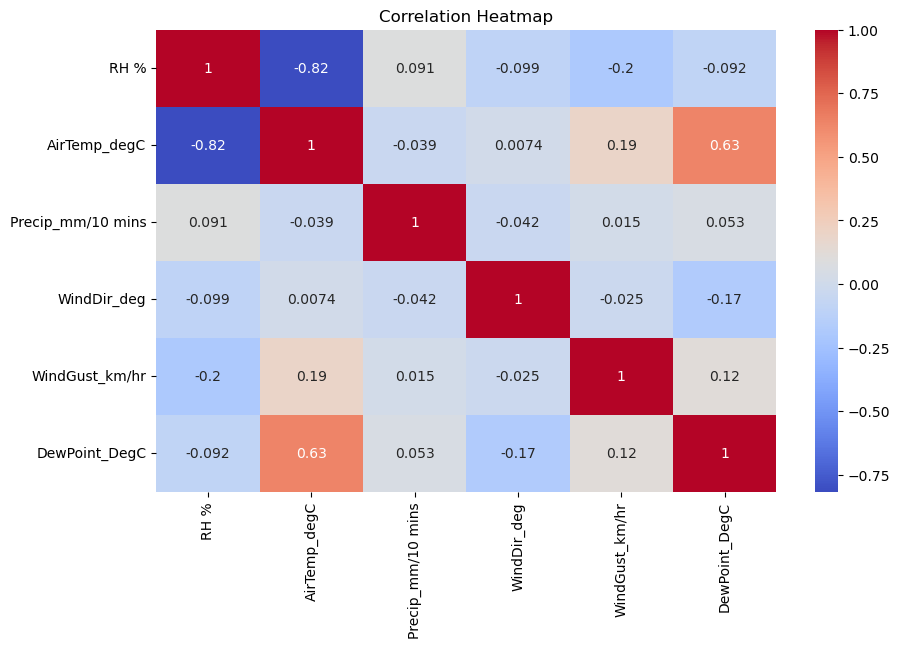

In [182]:
# Correlation heatmap (only for numeric columns)
numeric_df = df_rain.select_dtypes(include=['int64', 'float64'])
print(numeric_df.corr())

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


##### Results :
|Variable |	Strongly | Correlated With	Notes|
|---------|----------|-------------------------------------|
 |RH %|	AirTemp_degC (-0.82)|	As temp goes up, RH goes down
|AirTemp_degC |	DewPoint_DegC (+0.63) |	Warmer air = higher dew point|
|Precip_mm/10m| (No strong correlations) |	Rainfall is complex — not linearly tied to |one feature
|WindGust_km/hr | (Weak trends) |	Slightly warmer temps and lower humidity|

### Feature Engineerning


In [183]:
# ----------------------------
# 1. DATETIME FEATURE ENGINEERING
# ----------------------------

# Clean column names: lowercase, remove spaces
df_rain.columns = df_rain.columns.str.strip().str.replace(' ', '_').str.lower()

# Create 'datetime' column from 'date'
df_rain['datetime'] = pd.to_datetime(df_rain['date'] + ' ' + df_rain['time'], format='%d/%m/%Y %H:%M', errors='coerce')

# Extract time-based features
df_rain['hour'] = df_rain['datetime'].dt.hour
df_rain['minute'] = df_rain['datetime'].dt.minute
df_rain['time_of_day'] = df_rain['hour'].apply(
    lambda h: 'Night' if h < 6 else 'Morning' if h < 12 else 'Afternoon' if h < 18 else 'Evening'
)

# Extract date-related features
df_rain['day'] = df_rain['datetime'].dt.day
df_rain['month'] = df_rain['datetime'].dt.month
df_rain['year'] = df_rain['datetime'].dt.year

# ----------------------------
# 2. CLIMATE-DERIVED FEATURES
# ----------------------------

# Categorize Humidity: Low, Medium, High
def categorize_rh(rh):
    if rh < 40:
        return 'Low'
    elif rh < 70:
        return 'Medium'
    else:
        return 'High'

df_rain['rh_category'] = df_rain['rh_%'].apply(categorize_rh)

# Temperature-Humidity Index (a simple "feels like" temp formula)
df_rain['temp_humidity_index'] = df_rain['airtemp_degc'] + 0.33 * df_rain['rh_%'] - 0.70

# Wind chill (only applies when temp < 10°C and wind > 4.8 km/h)
def wind_chill(temp, wind):
    if temp < 10 and wind > 4.8:
        return 13.12 + 0.6215 * temp - 11.37 * (wind**0.16) + 0.3965 * temp * (wind**0.16)
    return temp

df_rain['wind_chill'] = df_rain.apply(
    lambda row: wind_chill(row['airtemp_degc'], row['windgust_km/hr']), axis=1
)

# Rain prediction based on previous hour's rainfall
df_rain['will_rain'] = (df_rain['precip_mm/10_mins'] > 0).astype(int)


In [184]:
# Remove duplicated engineered columns
df = df_rain.loc[:, ~df_rain.columns.duplicated()]
df

,date,time,rh_%,airtemp_degc,precip_mm/10_mins,winddir_deg,windgust_km/hr,dewpoint_degc,datetime,hour,minute,time_of_day,day,month,year,rh_category,temp_humidity_index,wind_chill,will_rain
0,10/02/2021,17:40,59.9,26.8,0.0,134.0,0.0,18.5,2021-02-10 17:40:00,17.0,40.0,Afternoon,10.0,2.0,2021.0,Medium,45.867,26.8,0
1,10/02/2021,17:50,62.1,26.2,0.0,175.0,0.0,18.5,2021-02-10 17:50:00,17.0,50.0,Afternoon,10.0,2.0,2021.0,Medium,45.993,26.2,0
2,10/02/2021,18:00,64.9,25.9,0.0,182.0,0.0,18.9,2021-02-10 18:00:00,18.0,0.0,Evening,10.0,2.0,2021.0,Medium,46.617,25.9,0
3,10/02/2021,18:10,70.0,24.9,0.0,182.0,0.0,19.2,2021-02-10 18:10:00,18.0,10.0,Evening,10.0,2.0,2021.0,High,47.300,24.9,0
4,10/02/2021,18:20,72.6,24.2,0.0,182.0,0.0,19.1,2021-02-10 18:20:00,18.0,20.0,Evening,10.0,2.0,2021.0,High,47.458,24.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71867,NaN,NaN,61.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,Evening,NaN,NaN,NaN,Medium,NaN,NaN,0
71868,NaN,NaN,61.2,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,Evening,NaN,NaN,NaN,Medium,NaN,NaN,0
71869,NaN,NaN,61.3,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,Evening,NaN,NaN,NaN,Medium,NaN,NaN,0
71884,NaN,NaN,60.8,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,Evening,NaN,NaN,NaN,Medium,NaN,NaN,0


In [185]:
# creating the df for training
# Define features and target

numeric_features = ['rh_%', 'airtemp_degc', 'winddir_deg', 'windgust_km/hr', 'dewpoint_degc', 'wind_chill', 'temp_humidity_index', 'hour', 'minute', 'day', 'month', 'year']        
categorical_features = ['rh_category', 'time_of_day']

features = numeric_features + categorical_features
X = df[features]
y = df['will_rain']  # Replace 'target' with your actual target column name


In [186]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63323 entries, 0 to 71887
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rh_%                 63323 non-null  float64
 1   airtemp_degc         62960 non-null  float64
 2   winddir_deg          62960 non-null  float64
 3   windgust_km/hr       62960 non-null  float64
 4   dewpoint_degc        62960 non-null  float64
 5   wind_chill           62960 non-null  float64
 6   temp_humidity_index  62960 non-null  float64
 7   hour                 62960 non-null  float64
 8   minute               62960 non-null  float64
 9   day                  62960 non-null  float64
 10  month                62960 non-null  float64
 11  year                 62960 non-null  float64
 12  rh_category          63323 non-null  object 
 13  time_of_day          63323 non-null  object 
dtypes: float64(12), object(2)
memory usage: 7.2+ MB


In [187]:
# Split into training and test sets (80% train, 20% test)
import pandas as pd
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [188]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

numeric_features = ['rh_%', 'airtemp_degc', 'winddir_deg', 'windgust_km/hr', 'dewpoint_degc', 'wind_chill', 'temp_humidity_index', 'hour', 'minute', 'day', 'month', 'year']        
categorical_features = ['rh_category', 'time_of_day']

# Numerical pipeline: impute + scale
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical pipeline: impute + one-hot encode
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines
processing_pipeline = ColumnTransformer(transformers=[
    ('num', num_pipeline, numeric_features),
    ('cat', cat_pipeline, categorical_features)
])
rf_modeling_pipeline_final = Pipeline([
    ('data_processing', processing_pipeline),
    ('ml', RandomForestClassifier(n_estimators=200, max_depth=4, class_weight='balanced'))]
)
rf_modeling_pipeline_final

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['rh_%', 'airtemp_degc',
                                                   'winddir_deg',
                                                   'windgust_km/hr',
                                                   'dewpoint_degc',
                                                   'wind_chill',
                                                   'temp_humidity_index',
                                                   'hour', 'minute', 'day',
                                                   'month', 'year']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['rh_category',
                                                   'time_of_day'])])),
                ('ml',
                 RandomForestClassifier(class_weight='balanced', max_depth=4,
                                        n_estimators=200))])

In [189]:
rf_modeling_pipeline_final.fit(X_train, y_train)
y_pred = rf_modeling_pipeline_final.predict(X_test)


In [190]:
import warnings
warnings.filterwarnings("ignore")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.754757204895381

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.74      0.85     11788
           1       0.21      0.92      0.34       877

    accuracy                           0.75     12665
   macro avg       0.60      0.83      0.60     12665
weighted avg       0.94      0.75      0.81     12665



In [191]:
from sklearn.metrics import mean_squared_error, r2_score ,classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import accuracy_score
# Cross Validation
scores = cross_val_score(rf_modeling_pipeline_final, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation scores: {scores}')


Cross-validation scores: [0.76223845 0.75927754 0.7677655  0.75155463 0.76132662]


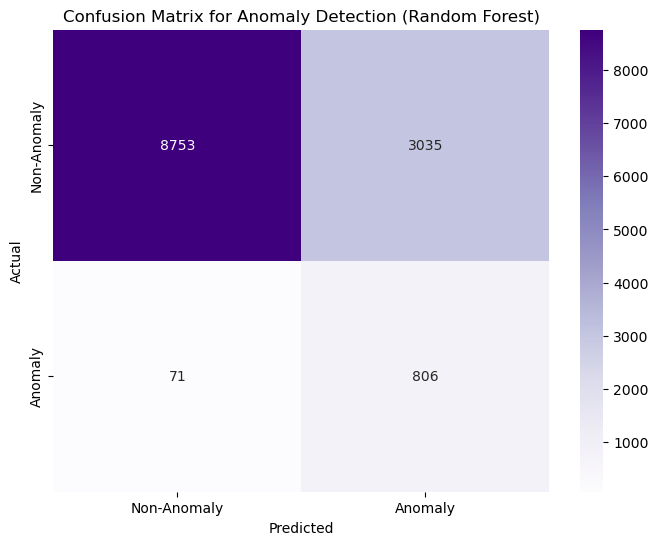

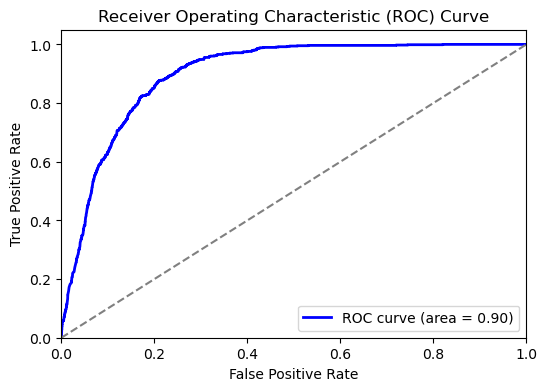

In [192]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['Non-Anomaly', 'Anomaly'], yticklabels=['Non-Anomaly', 'Anomaly'])
plt.title('Confusion Matrix for Anomaly Detection (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_modeling_pipeline_final.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Summary:
### 1. **Overall Accuracy: 75.8%**
- Lower than before (93%), but that’s **expected**.
- The model is no longer biased toward “no rain.”
- Accuracy drops because it now tries to **predict both classes**, not just the majority.

---

### 2. **Class `1` (Rain) Performance**
| Metric    | Value | What it Means |
|-----------|-------|----------------|
| **Precision** | 0.21  | Out of all "rain" predictions, 21% were actually rain  
| **Recall**    | 0.92  | Out of 877 actual rain events, it caught 92% — **awesome**  
| **F1-Score**  | 0.35  | Low-to-moderate balance due to low precision  

You're now **catching almost all rain events** (which is usually more important in weather forecasting).
But you’re **over-predicting rain**, hence the lower precision.

---

###  3. **Class `0` (No Rain)**
- **Precision** = 0.99 → Almost all "no rain" predictions were correct.
- **Recall** = 0.75 → 25% of dry hours were misclassified as rain (false positives).

---

###  4. **Macro vs Weighted Average**
| Metric        | Value | Insight |
|---------------|--------|---------|
| **Macro avg** | 0.60 F1 | A fairer view across both classes  
| **Weighted avg** | 0.82 F1 | Skewed by dominant class but still strong  

---

###  What’s Going Well:
- **Rain recall is excellent (92%)**
- **Model is now learning both classes**
- You’ve clearly **handled class imbalance**, maybe using `class_weight='balanced'` or `SMOTE`

---

###  What Can Be Improved:
- **Precision for rain (0.21)** is low → model cries wolf too often.
- You could:
  - Tune your **threshold** (default is 0.5; lowering it increases recall, raising it helps precision).
  - Try **ensemble techniques** or tweak **`max_depth`, `n_estimators`** in RandomForest.
  - Use **grid search** or **cross-validation** for better hyperparameters.





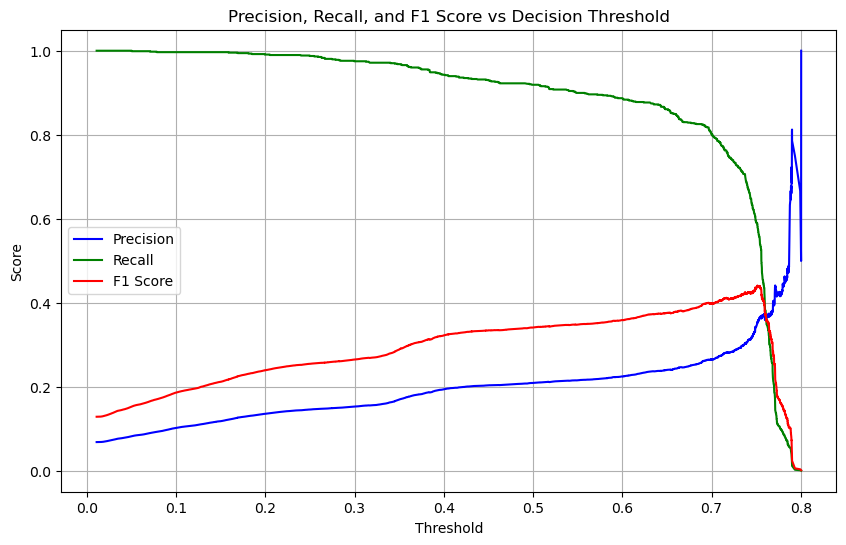

In [193]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score

# Get predicted probabilities for class 1 (rain)
y_proba = rf_modeling_pipeline_final.predict_proba(X_test)[:, 1]

# Get precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Compute F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)

# Plot precision, recall, F1 vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs Decision Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [194]:
# Pick the threshold that gives the highest F1
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best threshold by F1 score: {best_threshold:.2f}")

# Apply it to convert probabilities to class predictions
y_pred_custom = (y_proba >= best_threshold).astype(int)

# Evaluate with new threshold
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom))


Best threshold by F1 score: 0.75
Accuracy: 0.8967232530596131

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94     11788
           1       0.35      0.59      0.44       877

    accuracy                           0.90     12665
   macro avg       0.66      0.75      0.69     12665
weighted avg       0.93      0.90      0.91     12665




### Accuracy: **89.7%**
- Still strong, but this time it's *meaningful*.
- Your model is no longer cheating by always saying “no rain.”
- This accuracy reflects real effort in predicting both outcomes.

---

### Class `1` (Rain):
| Metric    | Value | What It Tells Us |
|-----------|-------|------------------|
| **Precision** | 0.35  | 35% of predicted rain cases were correct  
| **Recall**    | 0.59  | It caught 59% of actual rain cases — a big jump from 0% initially  
| **F1-Score**  | 0.44  | Much better balance than before  

You’re now correctly predicting **more than half of the actual rain events**, and that’s huge in weather forecasting.

---

### Class `0` (No Rain):
| Metric    | Value | Notes |
|-----------|-------|-------|
| **Precision** | 0.97  | Very few false rain alarms  
| **Recall**    | 0.92  | Still catches most no-rain hours  

✅ High performance on majority class is still intact.

---

### Macro Avg vs Weighted Avg:
| Metric        | Value | Interpretation |
|---------------|--------|----------------|
| **Macro Avg F1** | 0.69 | Balanced view across rain and no rain  
| **Weighted Avg F1** | 0.91 | Strong overall, weighted by class frequency  

---

### Why Threshold Tuning Helped
By raising the threshold to `0.75`, you're telling the model:
> "Only say it's going to rain if you're really confident."

This reduced false positives (higher precision) while still catching more true rain cases (higher recall).

